# Introduction to Data Science 2023
# PROJECT WORK


# DATA PROCESSING AND VISUALIZATION

EDA by 29th of September

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sleep_health_study = pd.read_csv('./data/Sleep_health_and_lifestyle_dataset.csv')

# print the first 5 rows of each dataframe side by side
display(sleep_health_study.head())



,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [2]:
# print the column names of each dataframe
print(sleep_health_study.columns)

# print the number of rows and columns of each dataframe
print(sleep_health_study.shape)


Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')
(374, 13)


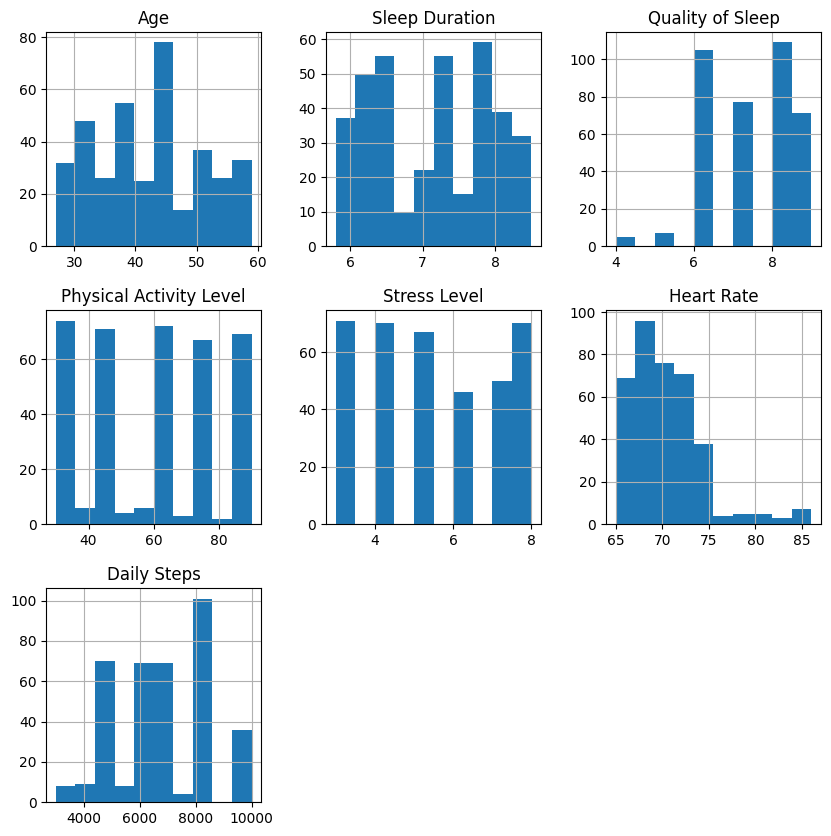

In [5]:
# plot all columns in a histogram
# exclude first column which is the id 

sleep_health_study.drop('Person ID', axis=1).hist(figsize=(10,10))
plt.show()


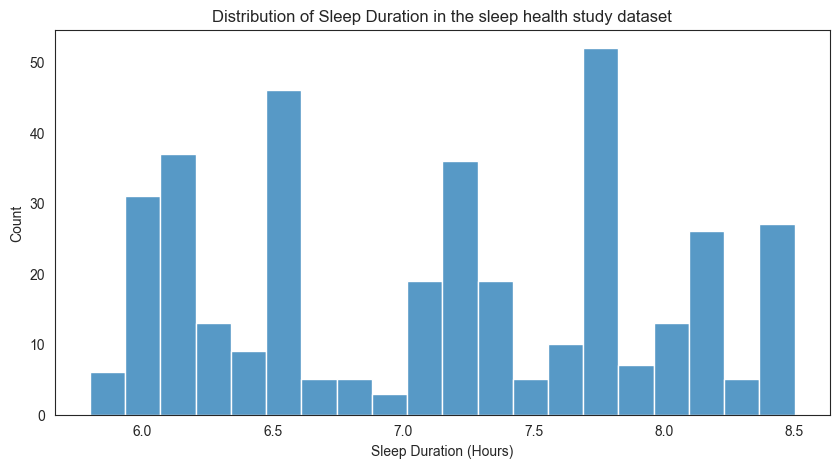

In [13]:
# create a plot showing the distribution of the sleep duration in the sleep health study dataset
# make the background white
sns.set_style('white')
plt.figure(figsize=(10, 5))
sns.histplot(data=sleep_health_study, x='Sleep Duration', bins=20)
plt.title('Distribution of Sleep Duration in the sleep health study dataset')
plt.xlabel('Sleep Duration (Hours)')
plt.ylabel('Count')
plt.show()



perhaps this should need normalization? 

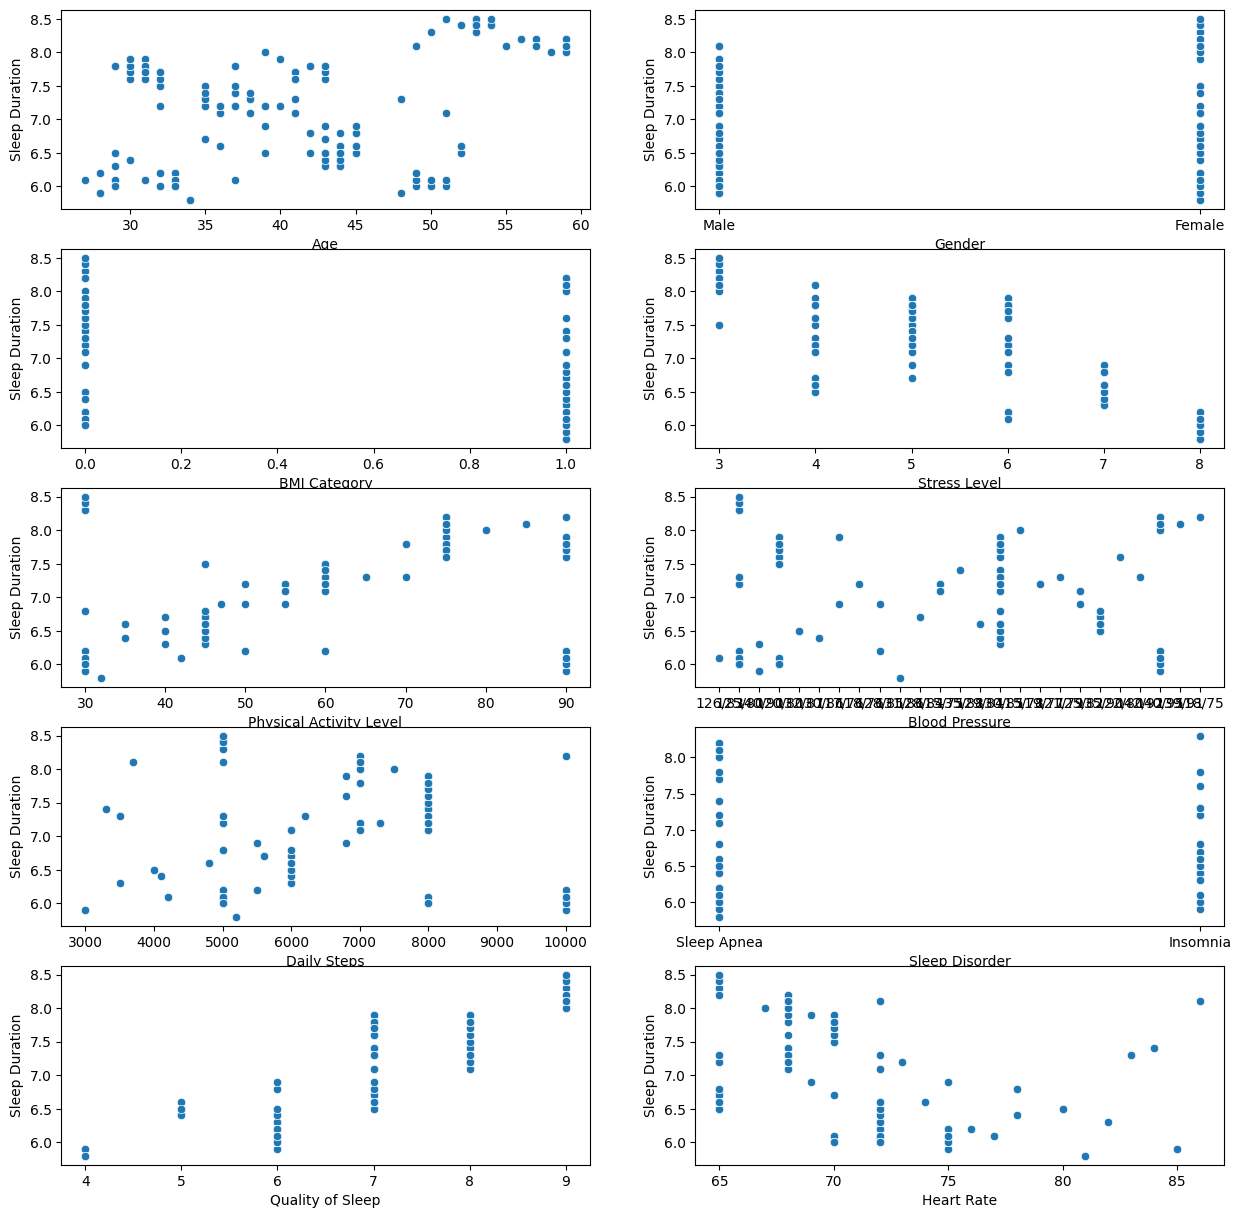

In [30]:
# try to find from the sleep healt study dataset some correlation between the sleep duration and the other variables
# lets create 4 plots so two rows and two columns

import warnings
warnings.filterwarnings('ignore')

fig, axes = plt.subplots(5, 2, figsize=(15, 15))
# plot 1: sleep duration vs age
sns.scatterplot(ax=axes[0, 0], data=sleep_health_study, y='Sleep Duration', x ='Age')
# plot 2: sleep duration vs gender
sns.scatterplot(ax=axes[0,1], data=sleep_health_study, y = 'Sleep Duration', x = 'Gender')
# plot 3: sleep duration vs BMI category
sns.scatterplot(ax=axes[1,0], data=sleep_health_study, y = 'Sleep Duration', x = 'BMI Category') 
# plot 4: sleep duration vs stress level
sns.scatterplot(ax=axes[1,1], data=sleep_health_study, y = 'Sleep Duration', x = 'Stress Level')
# plot 5: sleep duration vs physical activity level
sns.scatterplot(ax=axes[2,0], data=sleep_health_study, y = 'Sleep Duration', x = 'Physical Activity Level')
# plot 6: sleep duration vs blood pressure
sns.scatterplot(ax=axes[2,1], data=sleep_health_study, y = 'Sleep Duration', x = 'Blood Pressure')
# plot 7: sleep duration vs daily steps
sns.scatterplot(ax=axes[3,0], data=sleep_health_study, y = 'Sleep Duration', x = 'Daily Steps')
# plot 8: sleep duration vs sleep disorder
sns.scatterplot(ax=axes[3,1], data=sleep_health_study, y = 'Sleep Duration', x = 'Sleep Disorder')
# plot 9: sleep duration vs sleep quality
sns.scatterplot(ax=axes[4,0], data=sleep_health_study, y = 'Sleep Duration', x = 'Quality of Sleep')
# plot 10: sleep duration vs heart rate
sns.scatterplot(ax=axes[4,1], data=sleep_health_study, y = 'Sleep Duration', x = 'Heart Rate')
plt.show()


In [22]:
# next some summary statistics for the sleep duration from the sleep health study dataset
print('Sleep duration summary statistics in the Sleep health data set:')
print(sleep_health_study['Sleep Duration'].describe())

Sleep duration summary statistics:
count    374.000000
mean       7.132086
std        0.795657
min        5.800000
25%        6.400000
50%        7.200000
75%        7.800000
max        8.500000
Name: Sleep Duration, dtype: float64


In [13]:
# change the categorical variables to numerical variables from column 'BMI Category', 'Blood Pressure', 'Sleep Disorder' 
# in the sleep health study dataset
# BMI Category
# print the unique values of the column 'BMI Category'
print(sleep_health_study['BMI Category'].unique()) # there is two 'Normal' values and two 'Obese' values



['Overweight' 'Normal' 'Obese' 'Normal Weight']


In [25]:
print(sleep_health_study['Blood Pressure'].unique())

['126/83' '125/80' '140/90' '120/80' '132/87' '130/86' '117/76' '118/76'
 '128/85' '131/86' '128/84' '115/75' '135/88' '129/84' '130/85' '115/78'
 '119/77' '121/79' '125/82' '135/90' '122/80' '142/92' '140/95' '139/91'
 '118/75']


In [26]:
print (sleep_health_study['Blood Pressure'].value_counts())

Blood Pressure
130/85    99
140/95    65
125/80    65
120/80    45
115/75    32
135/90    27
140/90     4
125/82     4
132/87     3
128/85     3
126/83     2
115/78     2
139/91     2
142/92     2
119/77     2
135/88     2
129/84     2
128/84     2
131/86     2
117/76     2
130/86     2
118/75     2
121/79     1
122/80     1
118/76     1
Name: count, dtype: int64


In [39]:
# change BMI Category to numerical values 
# create second dataframe with the same name
sleep_health_study2 = sleep_health_study.copy()
sleep_health_study2['BMI Category'] = sleep_health_study['BMI Category'].replace({'Normal Weight': 0, 'Overweight': 1, 'Obese': 1, 'Normal': 0})


In [40]:
# print the unique values of the column 'BMI Category'
print(sleep_health_study2['BMI Category'].unique()) 

[1 0]


In [41]:
# create a table with the statistics of each column in the sleep health study dataset exclude the column 'Person ID'
sleep_health_study2.drop('Person ID', axis=1).describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,0.422460,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,0.494613,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,0.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,0.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,0.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,1.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,1.000000,86.000000,10000.000000


In [47]:
# for the blood pressure column we need to change the values to numerical values
# normal blood pressure is 120/80 or lower
# elevated blood pressure is 120-129/80 or lower
# high blood pressure stage 1 is 130-139/80-89
# high blood pressure stage 2 is 140 or higher/90 or higher
# hypertensive crisis is higher than 180/higher than 120
# first we need to split the column 'Blood Pressure' to two columns 'Systolic Blood Pressure' and 'Diastolic Blood Pressure'
# then we need to change the values to numerical values

# split the column 'Blood Pressure' to two columns 'Systolic Blood Pressure' and 'Diastolic Blood Pressure' and convert the values to numeric
sleep_health_study2[['Systolic Blood Pressure', 'Diastolic Blood Pressure']] = sleep_health_study2['Blood Pressure'].str.split('/', expand=True).astype(int)
# print the first 5 rows of the new dataframe
display(sleep_health_study2.head())

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic Blood Pressure,Diastolic Blood Pressure
0,1,Male,27,Software Engineer,6.1,6,42,6,1,126/83,77,4200,NaN,126,83
1,2,Male,28,Doctor,6.2,6,60,8,0,125/80,75,10000,NaN,125,80
2,3,Male,28,Doctor,6.2,6,60,8,0,125/80,75,10000,NaN,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,1,140/90,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,1,140/90,85,3000,Sleep Apnea,140,90


In [52]:
# lets conver the values to numerical values
# according to the American Heart Association https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings
# good blood pressure is 120/80 or lower
# elevated blood pressure is 120-129/80 or lower
# high blood pressure stage 1 is 130-139/80-89
# high blood pressure stage 2 is 140 or higher/90 or higher
# hypertensive crisis is higher than 180/higher than 120
def blood_pressure(x):
    if x['Systolic Blood Pressure'] < 120 and x['Diastolic Blood Pressure'] < 80:
        # change the value of the column 'Blood Pressure' to 0
        
        return 0
    elif x['Systolic Blood Pressure'] >= 120 and x['Systolic Blood Pressure'] <= 129 and x['Diastolic Blood Pressure'] < 80:
        return 1
    elif x['Systolic Blood Pressure'] >= 130 and x['Systolic Blood Pressure'] <= 139 or x['Diastolic Blood Pressure'] >= 80 and x['Diastolic Blood Pressure'] <= 89:
        return 2
    elif x['Systolic Blood Pressure'] >= 140 or x['Diastolic Blood Pressure'] >= 90:
        return  3
    elif x['Systolic Blood Pressure'] >= 180 or x['Diastolic Blood Pressure'] >= 120:
        return 4
    else:
        return 'error'
    
# apply the function to the dataframe
sleep_health_study2['Blood Pressure'] = sleep_health_study2.apply(blood_pressure, axis=1)


Diastolic Blood Pressure
80    111
85    102
95     65
75     34
90     31
82      4
86      4
84      4
87      3
76      3
92      2
83      2
77      2
78      2
88      2
91      2
79      1
Name: count, dtype: int64
Systolic Blood Pressure
130    101
140     69
125     69
120     45
115     34
135     29
128      5
132      3
118      3
126      2
119      2
142      2
131      2
129      2
117      2
139      2
121      1
122      1
Name: count, dtype: int64


In [54]:

# print the unique values of the column 'Diasystolic Blood Pressure' and the counts of each value
print(sleep_health_study2['Diastolic Blood Pressure'].value_counts())
print(sleep_health_study2['Systolic Blood Pressure'].value_counts())


# print the first 5 rows of the dataframe of the column 'Blood Pressure'
display(sleep_health_study2['Blood Pressure'].head())


Diastolic Blood Pressure
80    111
85    102
95     65
75     34
90     31
82      4
86      4
84      4
87      3
76      3
92      2
83      2
77      2
78      2
88      2
91      2
79      1
Name: count, dtype: int64
Systolic Blood Pressure
130    101
140     69
125     69
120     45
115     34
135     29
128      5
132      3
118      3
126      2
119      2
142      2
131      2
129      2
117      2
139      2
121      1
122      1
Name: count, dtype: int64


0    2
1    2
2    2
3    3
4    3
Name: Blood Pressure, dtype: int64

In [56]:
# print the column Blood Pressure
print(sleep_health_study2['Blood Pressure'])

0      2
1      2
2      2
3      3
4      3
      ..
369    3
370    3
371    3
372    3
373    3
Name: Blood Pressure, Length: 374, dtype: int64
